In [86]:
from google.colab import files
uploaded = files.upload()



Saving BTC-USD.csv to BTC-USD (2).csv


In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('BTC-USD.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [88]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3222 entries, 2014-09-17 to 2023-07-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3222 non-null   float64
 1   High    3222 non-null   float64
 2   Low     3222 non-null   float64
 3   Close   3222 non-null   float64
 4   Volume  3222 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 151.0 KB


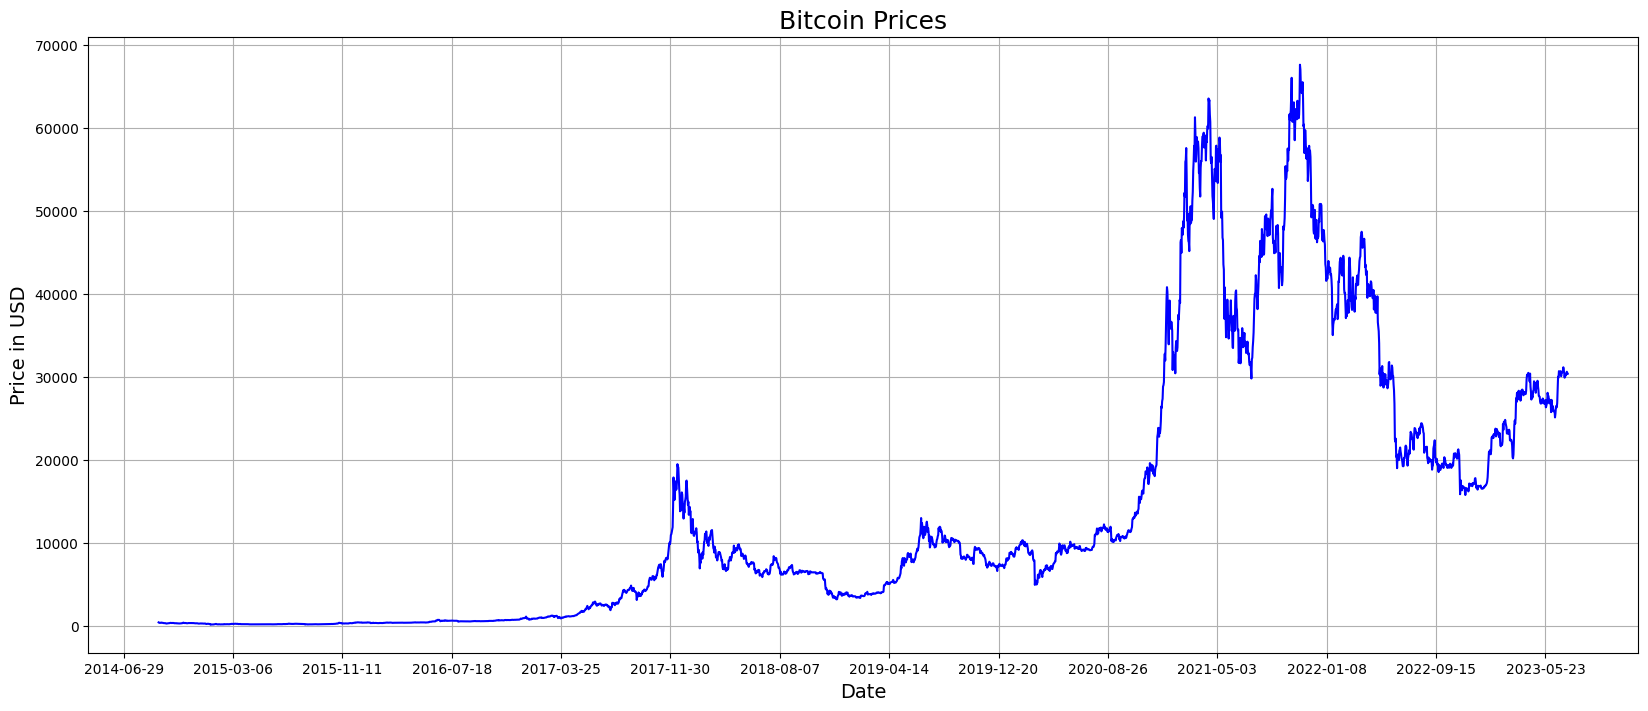

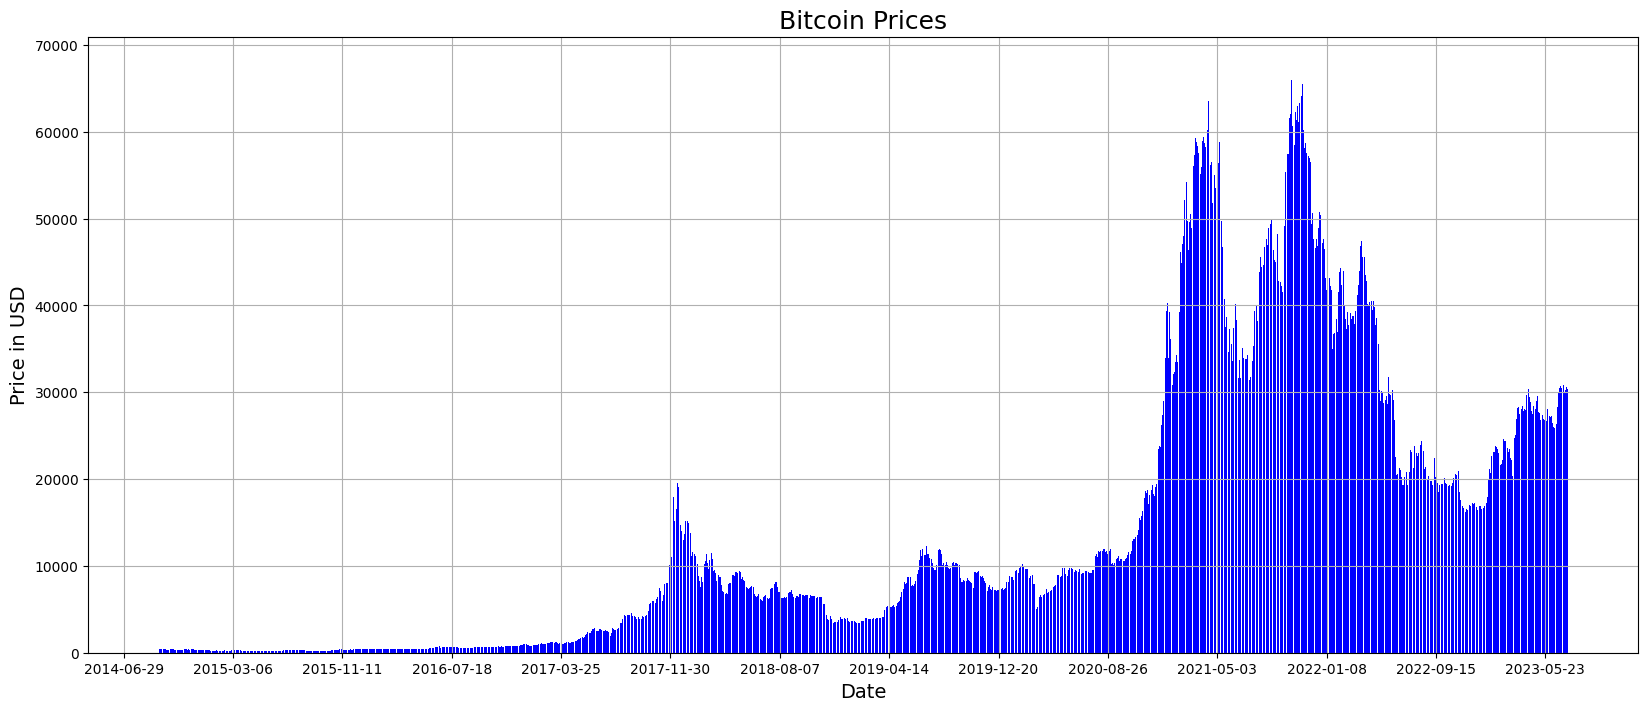

In [90]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df.index, df['Close'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Bitcoin Prices', fontsize=18)
plt.grid()
plt.show()

fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(df.index, df['Close'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Bitcoin Prices', fontsize=18)
plt.grid()
plt.show()

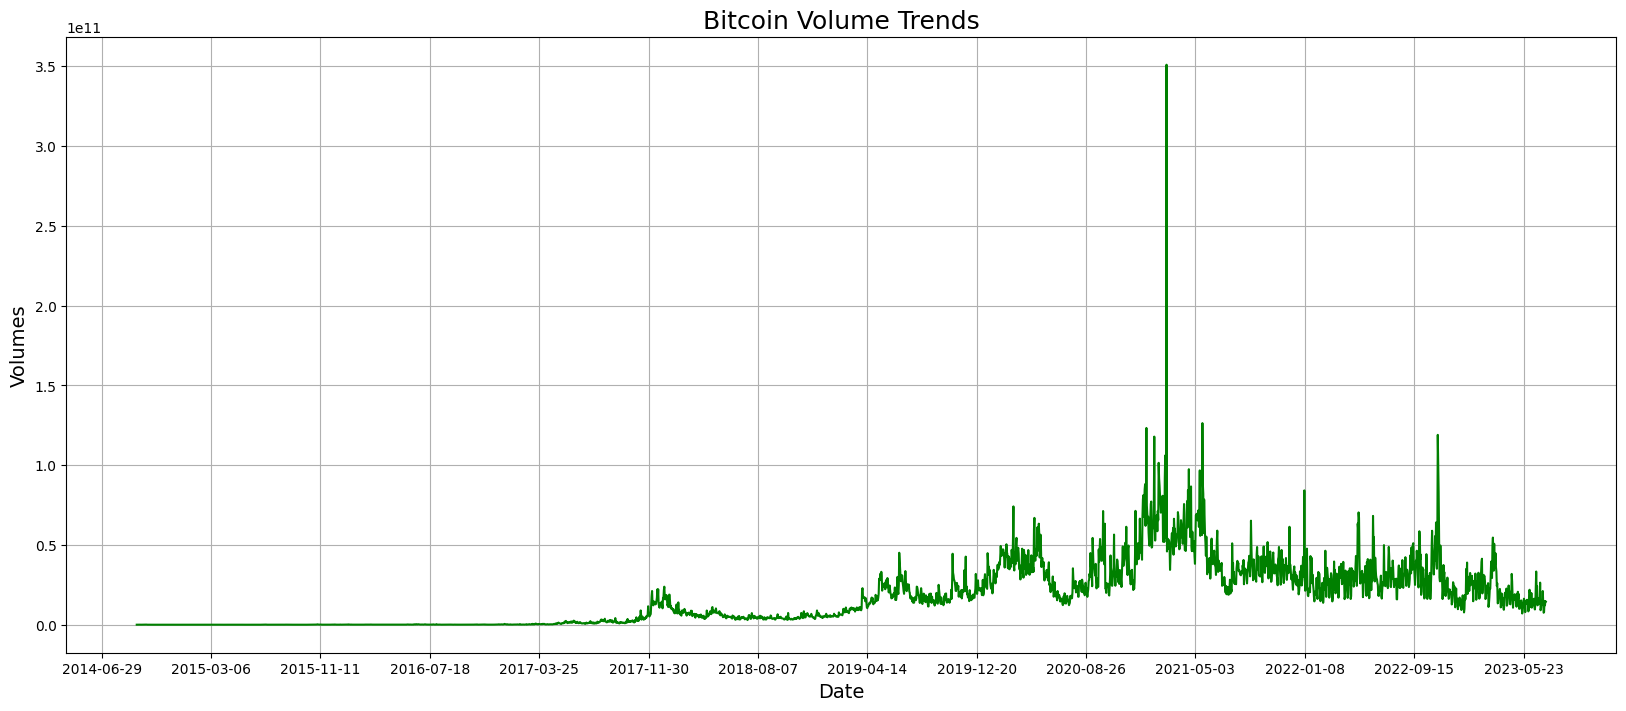

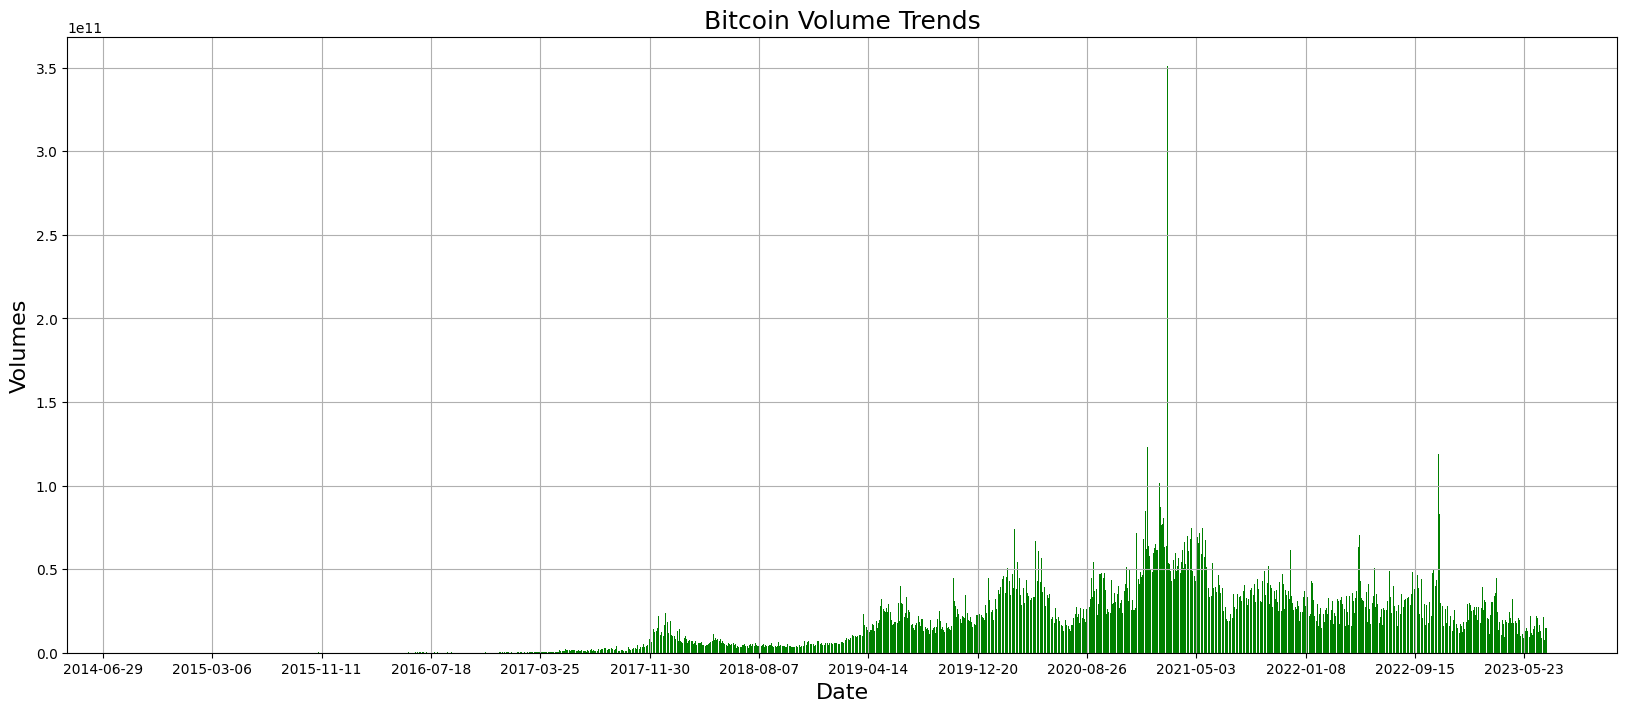

In [91]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df.index, df['Volume'], color ="green")
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Volumes', fontsize=14)
plt.title('Bitcoin Volume Trends', fontsize=18)
plt.grid()
plt.show()

fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(df.index, df['Volume'], color="green")
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Volumes', fontsize=16)
plt.title('Bitcoin Volume Trends', fontsize=18)
plt.grid()
plt.show()

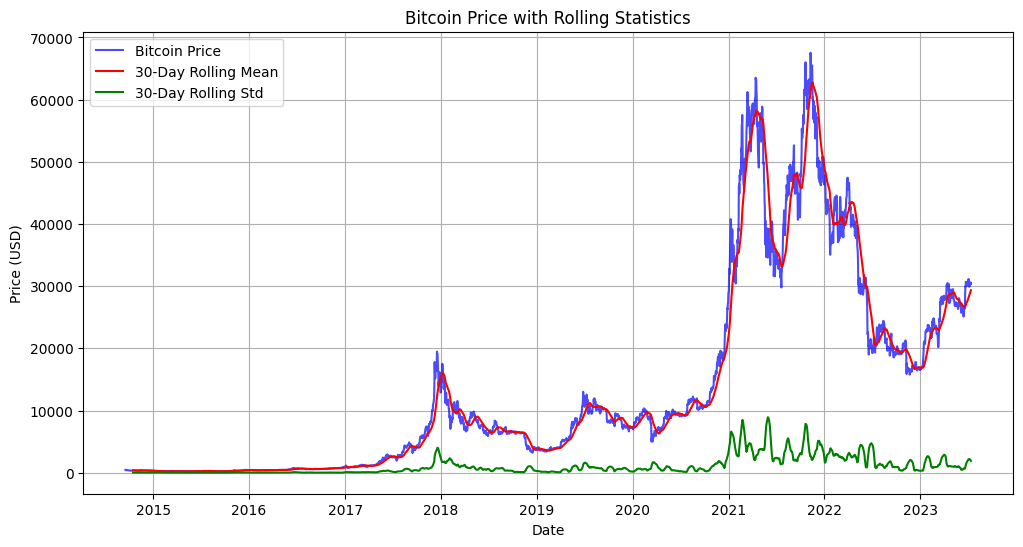

In [92]:
window_size = 30
rolling_mean = df['Open'].rolling(window=window_size).mean()
rolling_std = df['Open'].rolling(window=window_size).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='Bitcoin Price', color='blue', alpha=0.7)
plt.plot(df.index, rolling_mean, label=f'{window_size}-Day Rolling Mean', color='red')
plt.plot(df.index, rolling_std, label=f'{window_size}-Day Rolling Std', color='green')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price with Rolling Statistics')
plt.legend()
plt.grid()
plt.show()


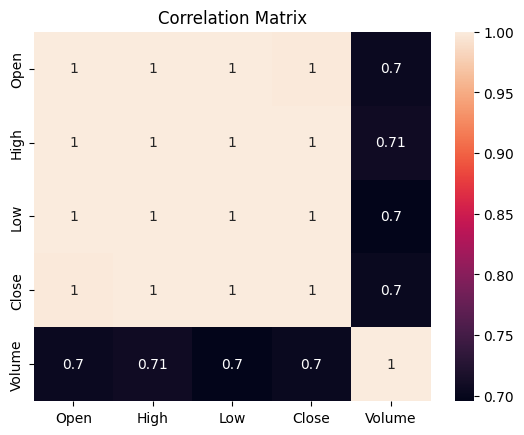

In [93]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [94]:
df.describe()

,Open,High,Low,Close,Volume
count,3222.000000,3222.000000,3222.000000,3222.000000,3.222000e+03
mean,13633.555524,13966.498897,13269.790975,13641.491658,1.657062e+10
std,16016.593310,16417.423832,15559.562019,16014.439000,1.950701e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,757.838730,772.024277,745.732499,759.970260,1.300485e+08
50%,7664.044434,7867.845215,7499.634766,7679.053711,1.017502e+10
75%,20210.792481,20660.277832,19811.524414,20238.632813,2.746342e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


In [95]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [96]:
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)


In [97]:
df.head()

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,402.152008


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_copy = df[['Close']].copy()

train_val_data, test_data = train_test_split(df_copy, test_size=0.15, shuffle=False)
train_data, val_data = train_test_split(train_val_data, test_size=0.1765, shuffle=False)

train_dates = train_data.index
val_dates = val_data.index
test_dates = test_data.index

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)

train_scaled = pd.DataFrame(train_scaled, columns=['Close'], index=train_dates)
val_scaled = pd.DataFrame(val_scaled, columns=['Close'], index=val_dates)
test_scaled = pd.DataFrame(test_scaled, columns=['Close'], index=test_dates)

print("Train:")
print(train_scaled.head())
print("Validation:")
print(val_scaled.head())
print("Test:")
print(test_scaled.head())


Train:
               Close
Date                
2014-09-17  0.014453
2014-09-18  0.012751
2014-09-19  0.011216
2014-09-20  0.011947
2014-09-21  0.011425
Validation:
               Close
Date                
2020-11-17  0.904138
2020-11-18  0.912347
2020-11-19  0.913024
2020-11-20  0.954652
2020-11-21  0.955735
Test:
               Close
Date                
2022-03-16  2.120462
2022-03-17  2.110495
2022-03-18  2.154481
2022-03-19  2.174642
2022-03-20  2.125839


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

def create_sequences(data, window_size):
    sequences, targets = [], []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i + window_size])
        targets.append(data[i + window_size])
    return np.array(sequences), np.array(targets)


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.where(y_true == 0, 1e-8, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_and_evaluate(model, X_test, y_test, test_dates, scaler, window_size, model_name="Model"):
    predictions = model.predict(X_test)

    predictions_inv = scaler.inverse_transform(predictions)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_inv, predictions_inv)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inv, predictions_inv)
    r2 = r2_score(y_test_inv, predictions_inv)
    mape = mean_absolute_percentage_error(y_test_inv, predictions_inv)
    ce = np.sum(y_test_inv - predictions_inv)

    pred_dates = test_dates[window_size:window_size + len(predictions_inv)]

    plt.figure(figsize=(12, 6))
    plt.plot(pred_dates, y_test_inv, label='Actual Values', color='blue')
    plt.plot(pred_dates, predictions_inv, label=f'{model_name} Predictions', color='orange', linestyle='--', alpha=0.8)
    plt.title(f'{model_name} Predictions vs Actual (Window={window_size})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    error = y_test_inv.flatten() - predictions_inv.flatten()
    plt.figure(figsize=(12, 4))
    plt.plot(pred_dates, error, color='red')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.title(f'{model_name} Prediction Error Over Time')
    plt.xlabel('Date')
    plt.ylabel('Error (Actual - Predicted)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📊 {model_name} Evaluation Metrics (Window={window_size})")
    print(f"MSE:   {mse:.2f}")
    print(f"RMSE:  {rmse:.2f}")
    print(f"MAE:   {mae:.2f}")
    print(f"MAPE:  {mape:.2f}%")
    print(f"CE:    {ce:.2f}")
    print(f"R²:    {r2:.4f}\n")

    return predictions_inv


In [101]:
window_size_30 = 30

train_sequences_30, train_targets_30 = create_sequences(train_scaled['Close'].values, window_size_30)
val_sequences_30, val_targets_30     = create_sequences(val_scaled['Close'].values, window_size_30)
test_sequences_30, test_targets_30   = create_sequences(test_scaled['Close'].values, window_size_30)

train_sequences_30 = train_sequences_30.reshape((-1, window_size_30, 1))
val_sequences_30   = val_sequences_30.reshape((-1, window_size_30, 1))
test_sequences_30  = test_sequences_30.reshape((-1, window_size_30, 1))

In [102]:
window_size_60 = 60

train_sequences_60, train_targets_60 = create_sequences(train_scaled['Close'].values, window_size_60)
val_sequences_60, val_targets_60     = create_sequences(val_scaled['Close'].values, window_size_60)
test_sequences_60, test_targets_60   = create_sequences(test_scaled['Close'].values, window_size_60)

train_sequences_60 = train_sequences_60.reshape((-1, window_size_60, 1))
val_sequences_60   = val_sequences_60.reshape((-1, window_size_60, 1))
test_sequences_60  = test_sequences_60.reshape((-1, window_size_60, 1))

In [103]:
window_size_90 = 90

train_sequences_90, train_targets_90 = create_sequences(train_scaled['Close'].values, window_size_90)
val_sequences_90, val_targets_90     = create_sequences(val_scaled['Close'].values, window_size_90)
test_sequences_90, test_targets_90   = create_sequences(test_scaled['Close'].values, window_size_90)

train_sequences_90 = train_sequences_90.reshape((-1, window_size_90, 1))
val_sequences_90   = val_sequences_90.reshape((-1, window_size_90, 1))
test_sequences_90  = test_sequences_90.reshape((-1, window_size_90, 1))

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

rnn_model_30 = Sequential([
    SimpleRNN(512, input_shape=(window_size_30, 1), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

rnn_model_30.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

history = rnn_model_30.fit(
    train_sequences_30, train_targets_30,
    epochs=100,
    batch_size=100,
    validation_data=(val_sequences_30, val_targets_30)
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.2095 - val_loss: 1.8351
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0049 - val_loss: 0.5476
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - val_loss: 0.3291
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 0.2272
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010 - val_loss: 0.1977
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 0.1654
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1715e-04 - val_loss: 0.1142
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3564e-04 - val_loss: 0.0920
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 - val_loss: 0.0768
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7689e-04 - val_loss: 0.0950
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7501e-04 - val_loss: 0.0887
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

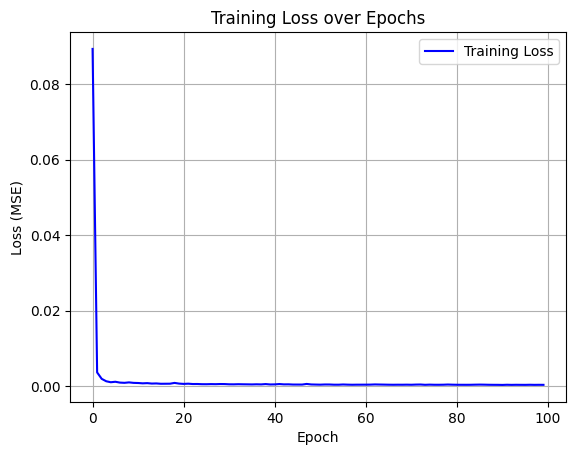

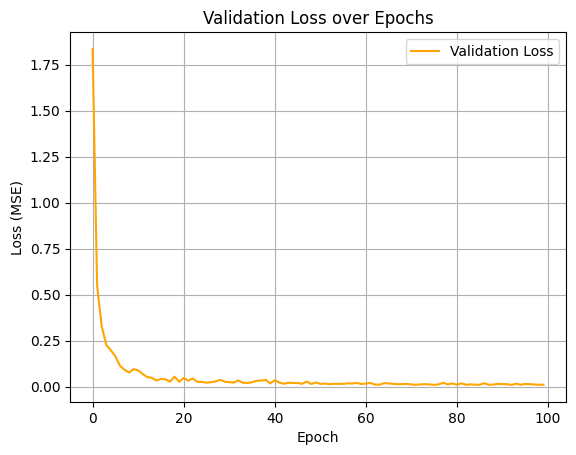

In [105]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Validation Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


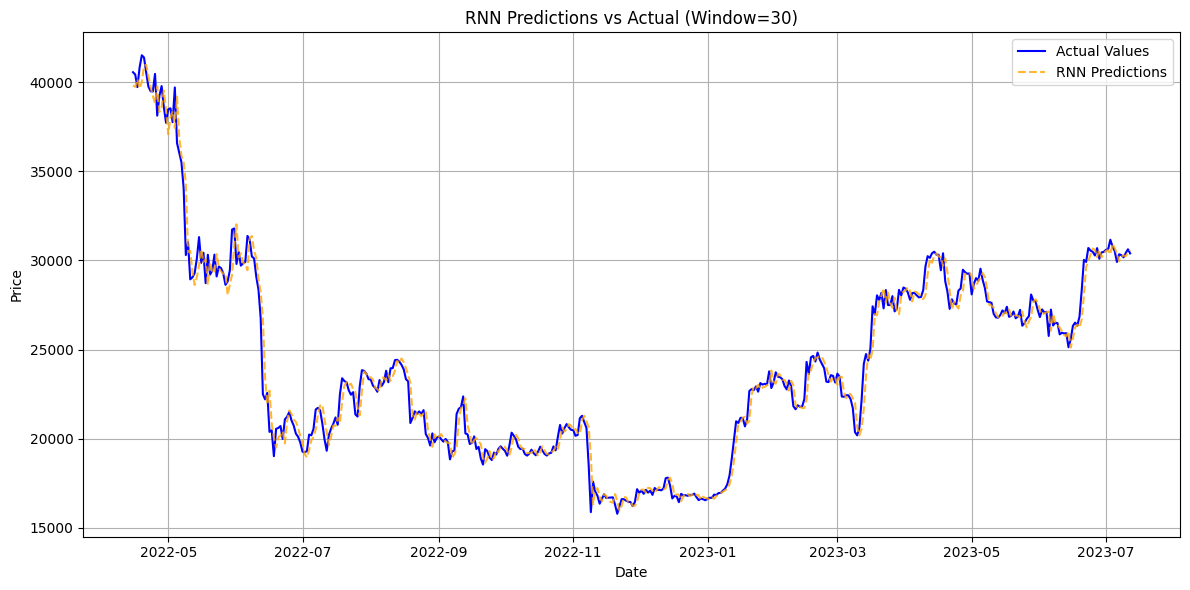

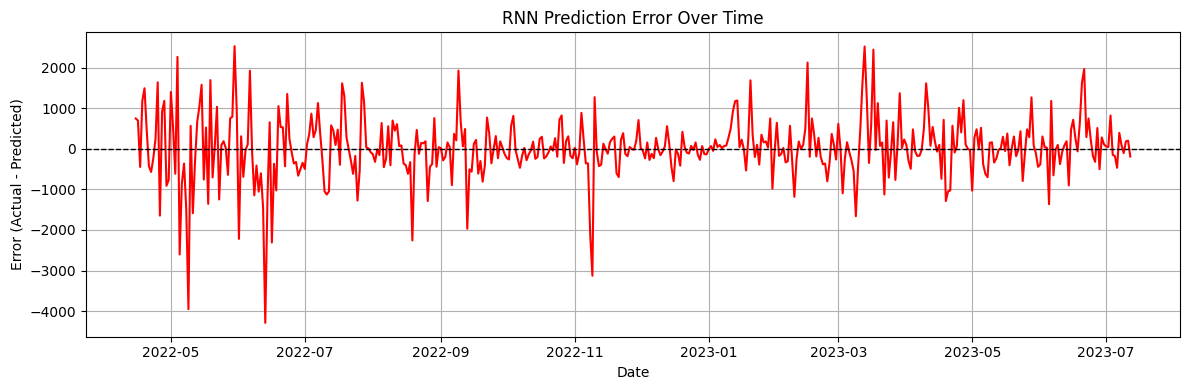

📊 RNN Evaluation Metrics (Window=30)
MSE:   588111.41
RMSE:  766.88
MAE:   511.92
MAPE:  2.11%
CE:    5889.08
R²:    0.9815



In [106]:
test_dates = test_data.index
rnn_predictions = plot_and_evaluate(
    model=rnn_model_30,
    X_test=test_sequences_30,
    y_test=test_targets_30,
    test_dates=test_dates,
    scaler=scaler,
    window_size=window_size_30,
    model_name="RNN"
)

In [107]:
rnn_model_60 = Sequential([
    SimpleRNN(512, input_shape=(window_size_60, 1), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
rnn_model_60.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
history = rnn_model_60.fit(train_sequences_60, train_targets_60, epochs=100, batch_size=100, validation_data=(val_sequences_60, val_targets_60))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.1583 - val_loss: 1.2133
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0769 - val_loss: 1.0976
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0052 - val_loss: 0.6299
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - val_loss: 0.4702
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - val_loss: 0.3930
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0015 - val_loss: 0.3489
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013 - val_loss: 0.2929
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 0.2645
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.9773e-04 - val_loss: 0.2222
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7817e-04 - val_loss: 0.2055
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.7865e-04 - val_loss: 0.1818
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

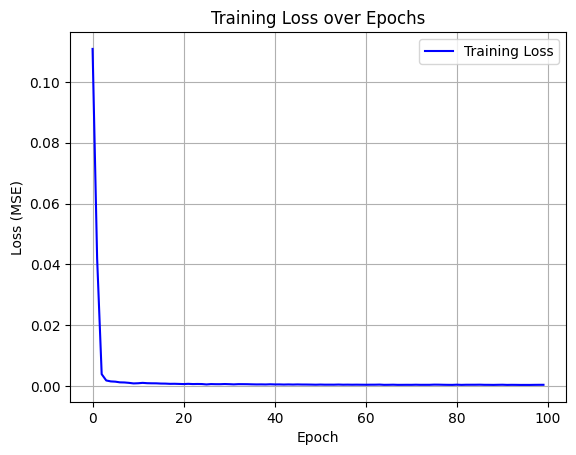

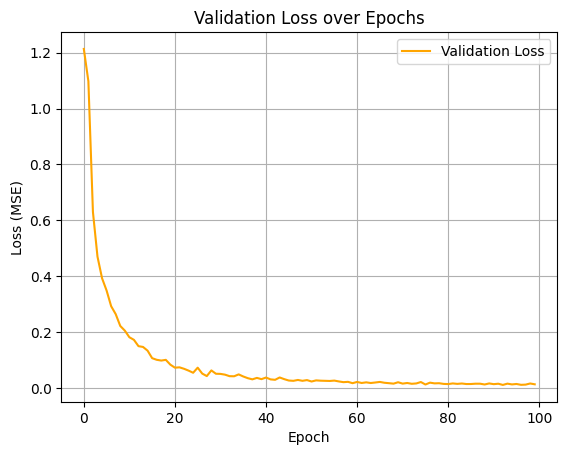

In [108]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Validation Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


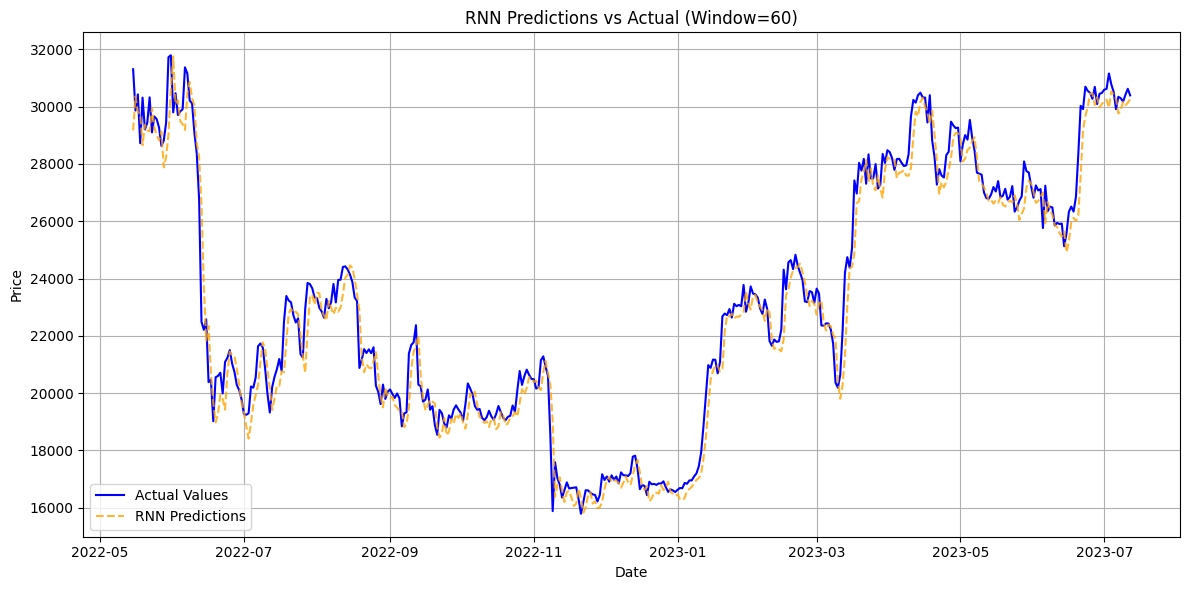

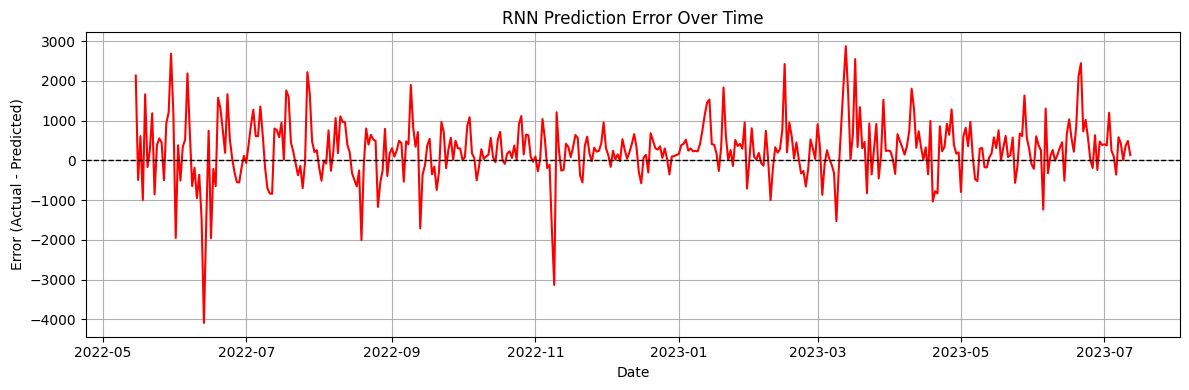

📊 RNN Evaluation Metrics (Window=60)
MSE:   607061.37
RMSE:  779.14
MAE:   556.62
MAPE:  2.41%
CE:    111148.55
R²:    0.9697



In [109]:
test_dates = test_data.index
rnn_predictions = plot_and_evaluate(
    model=rnn_model_60,
    X_test=test_sequences_60,
    y_test=test_targets_60,
    test_dates=test_dates,
    scaler=scaler,
    window_size=window_size_60,
    model_name="RNN"
)

In [110]:
rnn_model_90 = Sequential([
    SimpleRNN(512, input_shape=(window_size_90, 1), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
rnn_model_90.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
history = rnn_model_90.fit(train_sequences_90, train_targets_90, epochs=100, batch_size=100, validation_data=(val_sequences_90, val_targets_90))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.6478 - val_loss: 3.9550
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3341 - val_loss: 3.0589
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2194 - val_loss: 3.7729
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2039 - val_loss: 3.0362
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1470 - val_loss: 1.6509
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1028 - val_loss: 1.0810
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0722 - val_loss: 0.4643
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0488 - val_loss: 0.3565
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0368 - val_loss: 0.3147
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0257 - val_loss: 0.3899
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0213 - val_loss: 0.3637
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0

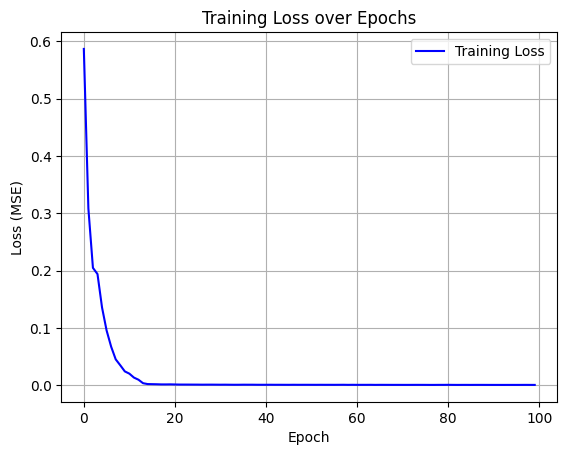

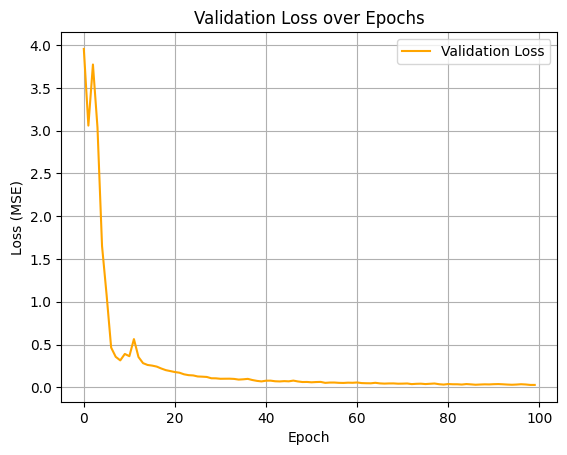

In [111]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Validation Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


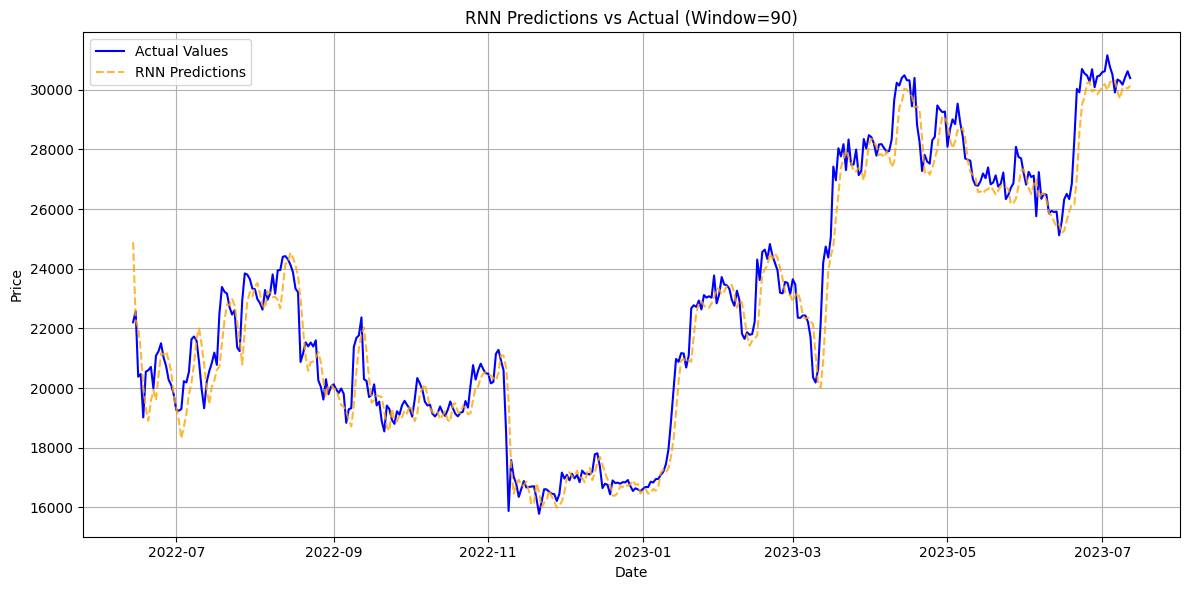

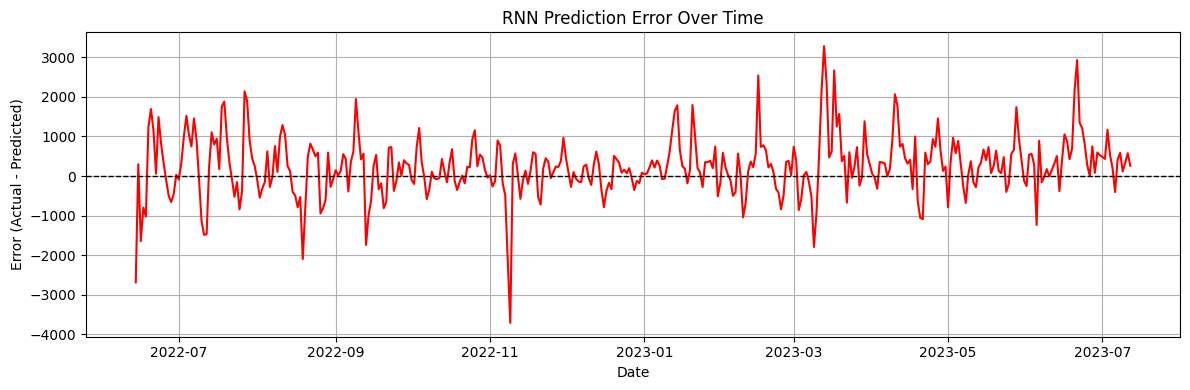

📊 RNN Evaluation Metrics (Window=90)
MSE:   628772.68
RMSE:  792.95
MAE:   568.04
MAPE:  2.52%
CE:    93034.81
R²:    0.9651



In [112]:
test_dates = test_data.index
rnn_predictions = plot_and_evaluate(
    model=rnn_model_90,
    X_test=test_sequences_90,
    y_test=test_targets_90,
    test_dates=test_dates,
    scaler=scaler,
    window_size=window_size_90,
    model_name="RNN"
)

In [113]:
from tensorflow.keras.layers import LSTM

lstm_model_30 = Sequential([
    LSTM(512, input_shape=(window_size_30, 1)),
    Dense(1)
])
lstm_model_30.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
history = lstm_model_30.fit(
    train_sequences_30, train_targets_30,
    epochs=100,
    batch_size=100,
    validation_data=(val_sequences_30, val_targets_30)
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0183 - val_loss: 0.0530
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.8662e-04 - val_loss: 0.0314
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.2178e-04 - val_loss: 0.0500
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.4943e-04 - val_loss: 0.0302
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.7206e-04 - val_loss: 0.0462
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3758e-04 - val_loss: 0.0528
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.1655e-04 - val_loss: 0.0903
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.2795e-04 - val_loss: 0.0715
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.7172e-04 - val_loss: 0.0674
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.6450e-04 - val_loss: 0.0543
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8786e-04 - val_loss: 0.0444
Epoch 12/100
23/23 ━━━━━

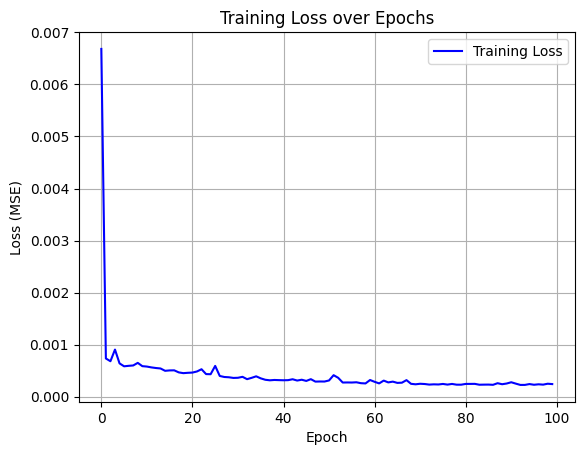

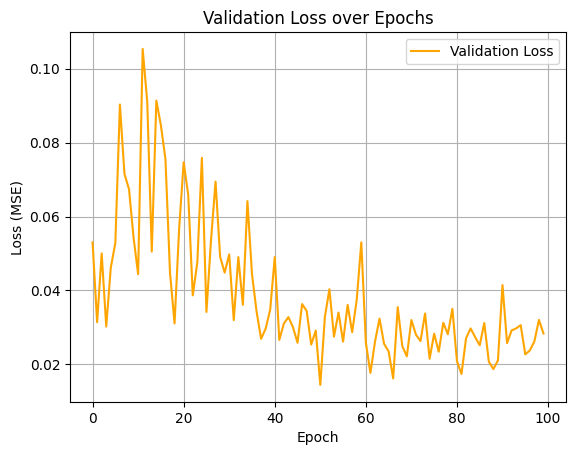

In [114]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Validation Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


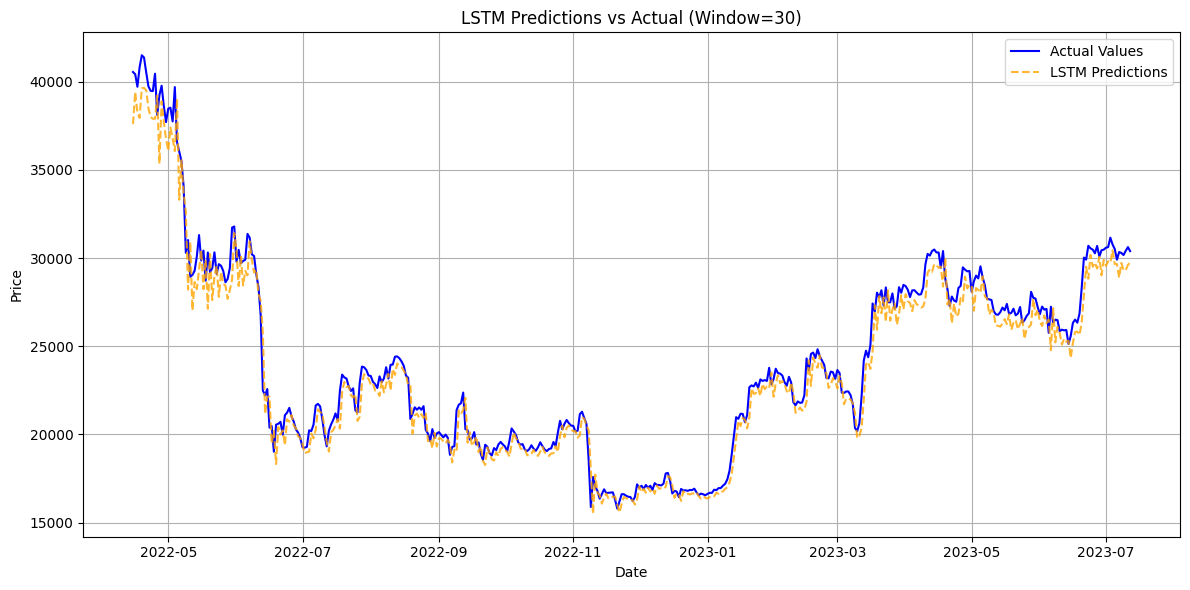

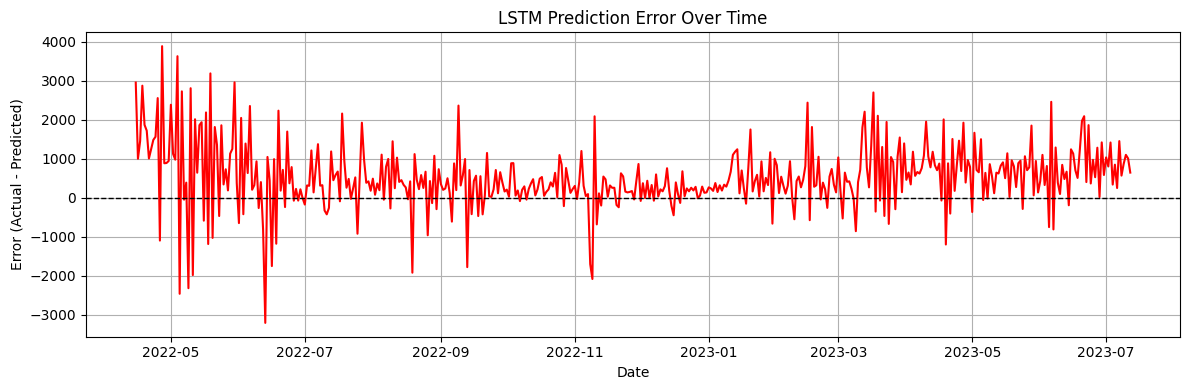

📊 LSTM Evaluation Metrics (Window=30)
MSE:   989177.52
RMSE:  994.57
MAE:   732.93
MAPE:  2.89%
CE:    241368.20
R²:    0.9688



In [115]:
test_dates = test_data.index
lstm_predictions = plot_and_evaluate(
    model=lstm_model_30,
    X_test=test_sequences_30,
    y_test=test_targets_30,
    test_dates=test_dates,
    scaler=scaler,
    window_size=window_size_30,
    model_name="LSTM"
)

In [116]:
lstm_model_60 = Sequential([
    LSTM(512, input_shape=(window_size_60, 1)),
    Dense(1)
])
lstm_model_60.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
history = lstm_model_60.fit(train_sequences_60, train_targets_60, epochs=100, batch_size=100, validation_data=(val_sequences_60, val_targets_60))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0246 - val_loss: 0.0278
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.2453e-04 - val_loss: 0.0604
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.5919e-04 - val_loss: 0.0383
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.0956e-04 - val_loss: 0.0351
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.8138e-04 - val_loss: 0.0595
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.7588e-04 - val_loss: 0.0557
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.1547e-04 - val_loss: 0.1066
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.2714e-04 - val_loss: 0.0568
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.6025e-04 - val_loss: 0.0681
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.8245e-04 - val_loss: 0.0614
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.1857e-04 - val_loss: 0.0579
Epoch 12/100

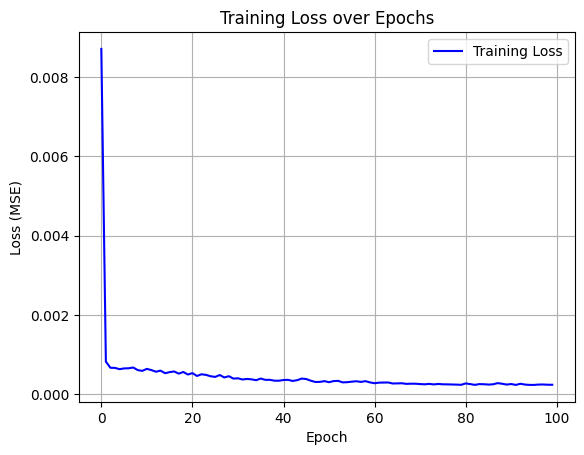

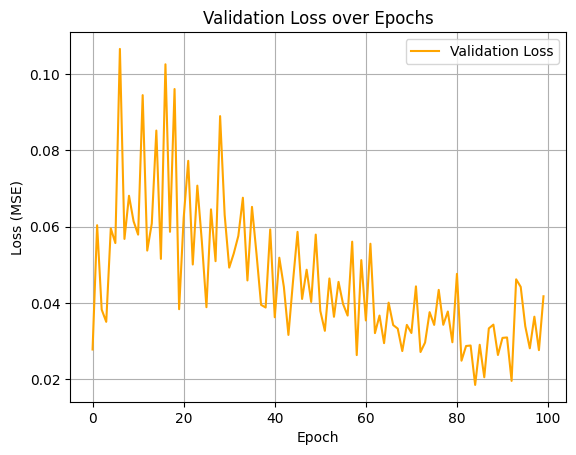

In [117]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Validation Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


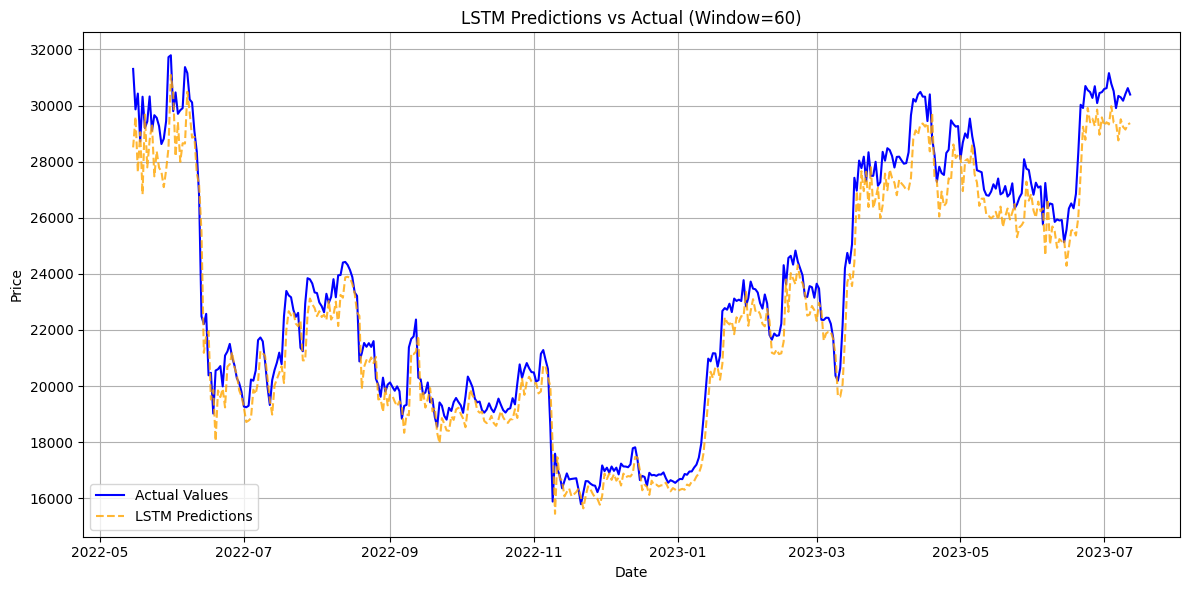

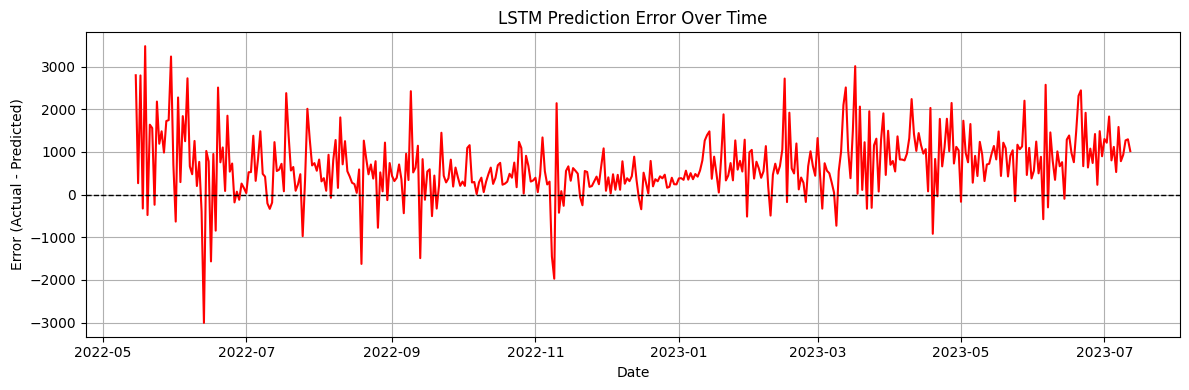

📊 LSTM Evaluation Metrics (Window=60)
MSE:   1024282.60
RMSE:  1012.07
MAE:   797.62
MAPE:  3.34%
CE:    287918.75
R²:    0.9489



In [118]:
test_dates = test_data.index
lstm_predictions = plot_and_evaluate(
    model=lstm_model_60,
    X_test=test_sequences_60,
    y_test=test_targets_60,
    test_dates=test_dates,
    scaler=scaler,
    window_size=window_size_60,
    model_name="LSTM"
)

In [119]:
lstm_model_90 = Sequential([
    LSTM(512, input_shape=(window_size_90, 1)),
    Dense(1)
])
lstm_model_90.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
history = lstm_model_90.fit(train_sequences_90, train_targets_90, epochs=100, batch_size=100, validation_data=(val_sequences_90, val_targets_90))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0217 - val_loss: 0.0324
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0012 - val_loss: 0.0528
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 7.5155e-04 - val_loss: 0.0355
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 8.3149e-04 - val_loss: 0.0398
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.1023e-04 - val_loss: 0.0494
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.5581e-04 - val_loss: 0.0598
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.3420e-04 - val_loss: 0.0810
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.5571e-04 - val_loss: 0.0439
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.4134e-04 - val_loss: 0.0484
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.3344e-04 - val_loss: 0.0952
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.6414e-04 - val_loss: 0.0441
Epoch 12/100
22/22 ━━━━━━━━━

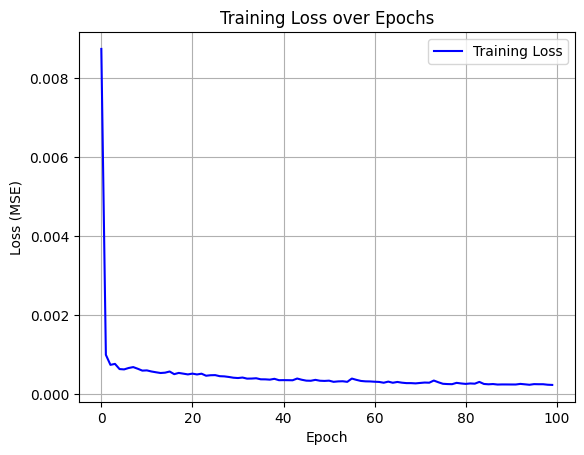

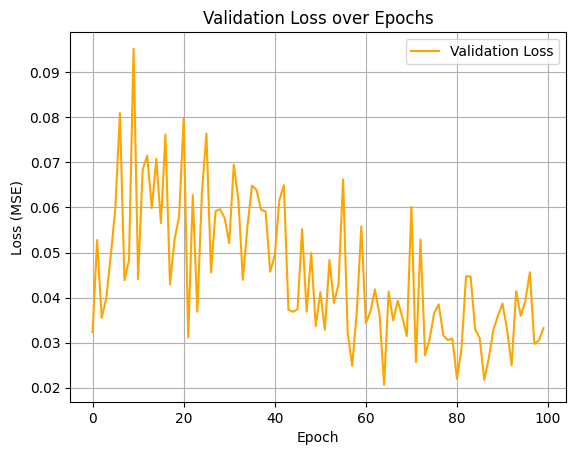

In [120]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Validation Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


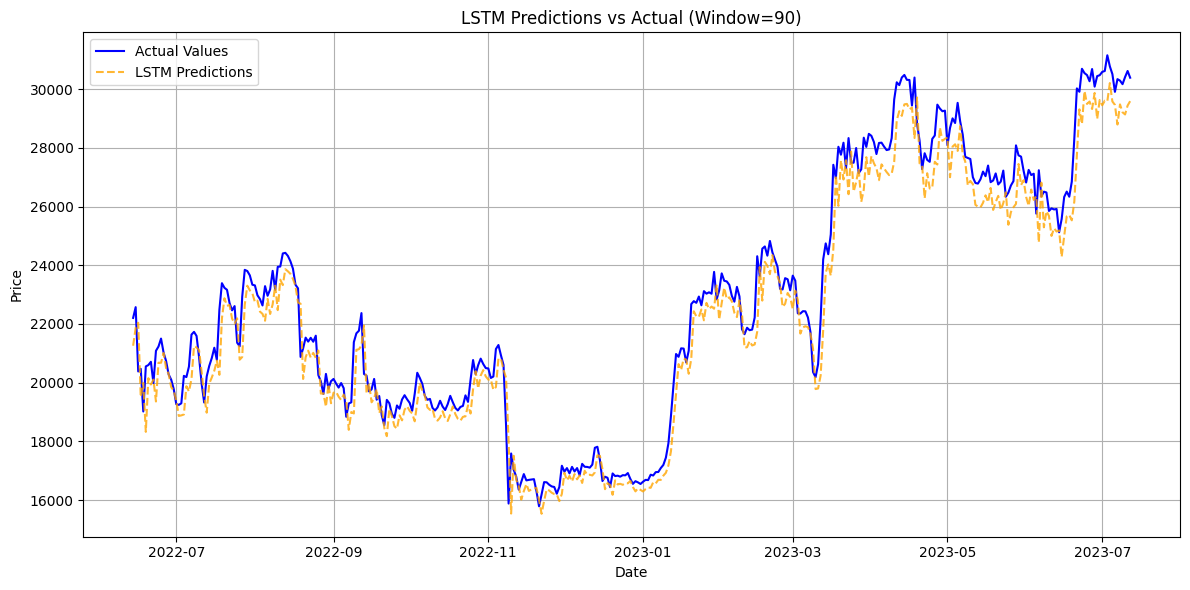

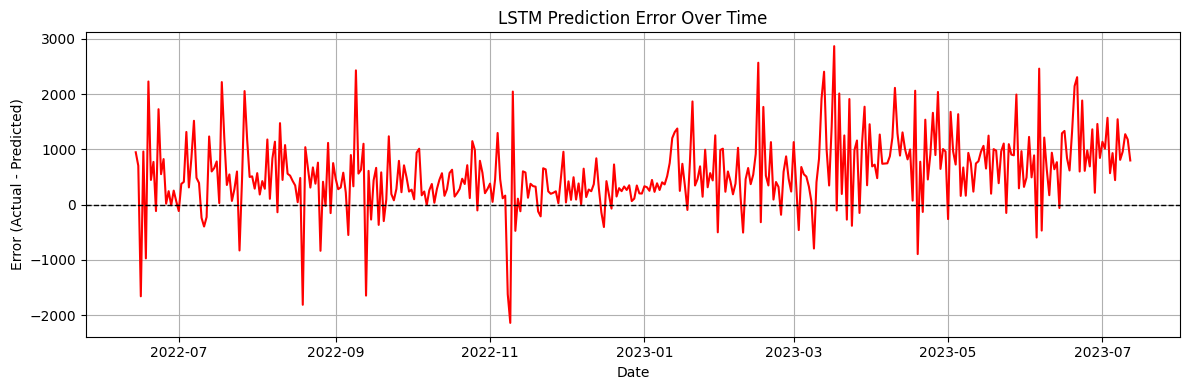

📊 LSTM Evaluation Metrics (Window=90)
MSE:   759543.56
RMSE:  871.52
MAE:   684.71
MAPE:  2.94%
CE:    224910.67
R²:    0.9579



In [121]:
test_dates = test_data.index
lstm_predictions = plot_and_evaluate(
    model=lstm_model_90,
    X_test=test_sequences_90,
    y_test=test_targets_90,
    test_dates=test_dates,
    scaler=scaler,
    window_size=window_size_90,
    model_name="LSTM"
)

In [122]:
from tensorflow.keras.layers import GRU

gru_model_30 = Sequential([
    GRU(512, input_shape=(window_size_30, 1)),
    Dense(1)
])
gru_model_30.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
history = gru_model_30.fit(train_sequences_30, train_targets_30, epochs=100, batch_size=100, validation_data=(val_sequences_30, val_targets_30))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0285 - val_loss: 0.0197
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.3310e-04 - val_loss: 0.0280
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.6543e-04 - val_loss: 0.0190
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4889e-04 - val_loss: 0.0170
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.9633e-04 - val_loss: 0.0168
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.8758e-04 - val_loss: 0.0161
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.7007e-04 - val_loss: 0.0176
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.5118e-04 - val_loss: 0.0193
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4133e-04 - val_loss: 0.0145
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.3685e-04 - val_loss: 0.0188
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6313e-04 - val_loss: 0.0160
Epoch 12/100

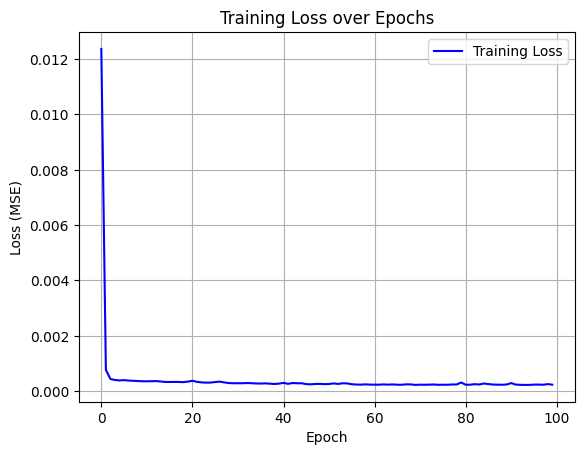

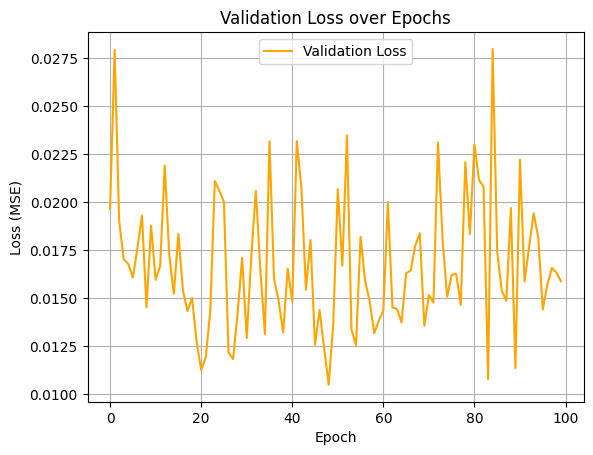

In [123]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Validation Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


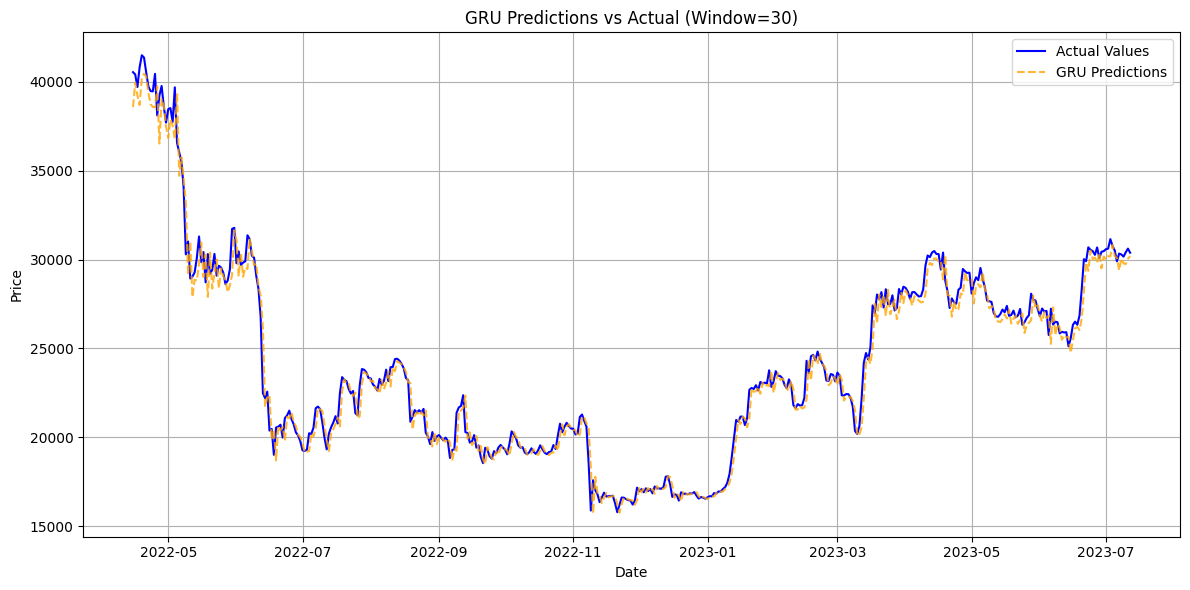

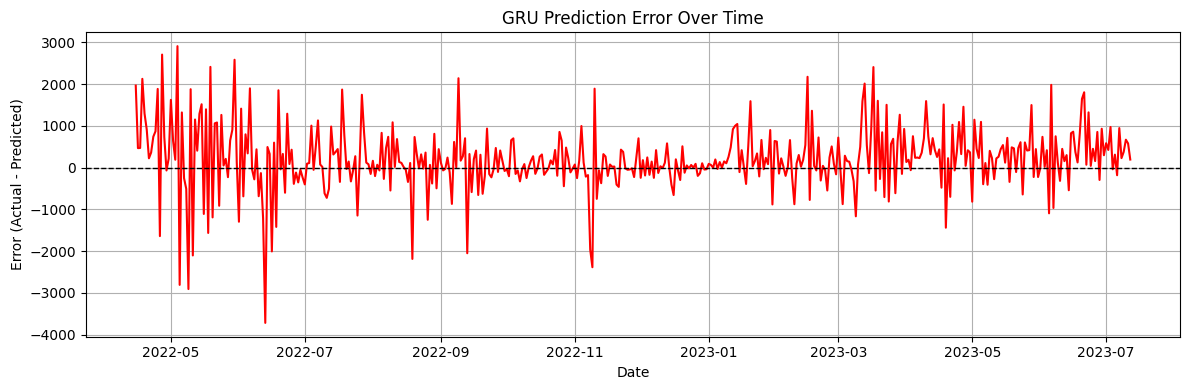

📊 GRU Evaluation Metrics (Window=30)
MSE:   643850.70
RMSE:  802.40
MAE:   548.71
MAPE:  2.20%
CE:    93389.57
R²:    0.9797



In [124]:
test_dates = test_data.index
rnn_predictions = plot_and_evaluate(
    model=gru_model_30,
    X_test=test_sequences_30,
    y_test=test_targets_30,
    test_dates=test_dates,
    scaler=scaler,
    window_size=window_size_30,
    model_name="GRU"
)

In [125]:
gru_model_60 = Sequential([
    GRU(512, input_shape=(window_size_60, 1)),
    Dense(1)
])
gru_model_60.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
history = gru_model_60.fit(train_sequences_60, train_targets_60, epochs=100, batch_size=100, validation_data=(val_sequences_60, val_targets_60))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0268 - val_loss: 0.0170
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.8651e-04 - val_loss: 0.0289
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.3104e-04 - val_loss: 0.0166
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.0964e-04 - val_loss: 0.0173
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.8678e-04 - val_loss: 0.0190
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.1301e-04 - val_loss: 0.0215
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.7066e-04 - val_loss: 0.0144
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.8964e-04 - val_loss: 0.0150
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.3918e-04 - val_loss: 0.0242
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.7478e-04 - val_loss: 0.0178
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.9039e-04 - val_loss: 0.0186
Epoch 12/100
22/22 ━━━━━

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


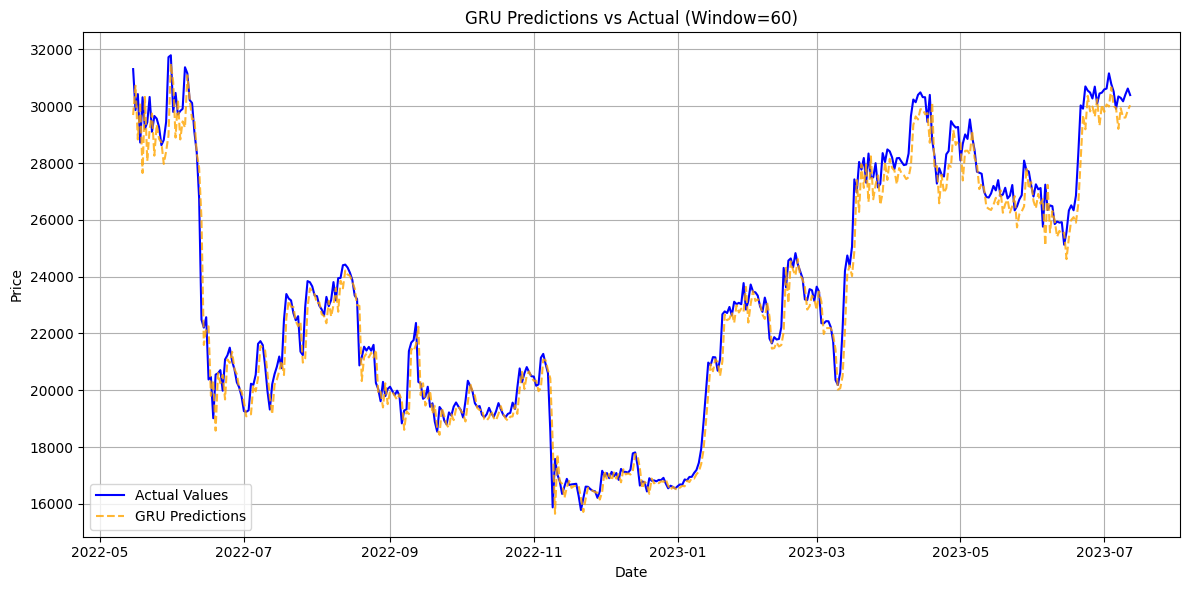

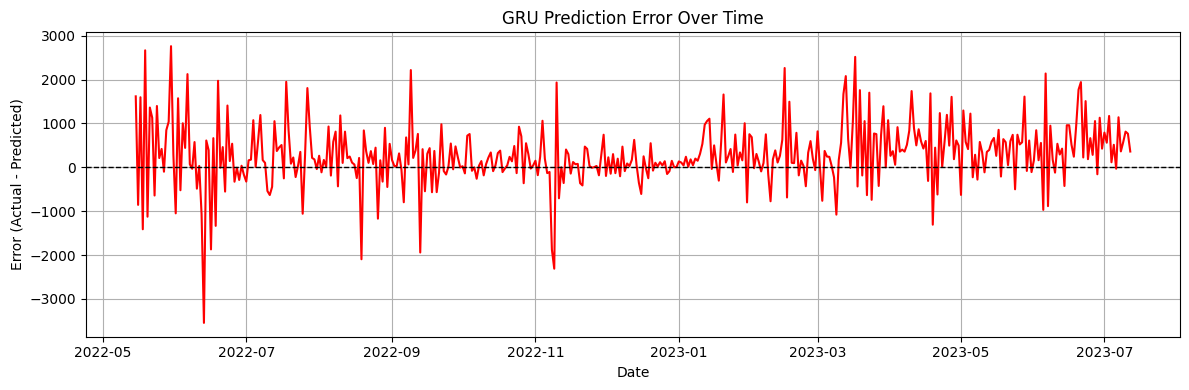

📊 GRU Evaluation Metrics (Window=60)
MSE:   588370.77
RMSE:  767.05
MAE:   540.24
MAPE:  2.27%
CE:    120055.16
R²:    0.9706



In [126]:
test_dates = test_data.index
rnn_predictions = plot_and_evaluate(
    model=gru_model_60,
    X_test=test_sequences_60,
    y_test=test_targets_60,
    test_dates=test_dates,
    scaler=scaler,
    window_size=window_size_60,
    model_name="GRU"
)

In [127]:
gru_model_90 = Sequential([
    GRU(512, input_shape=(window_size_90, 1)),
    Dense(1)
])
gru_model_90.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
history = gru_model_90.fit(train_sequences_90, train_targets_90, epochs=100, batch_size=100, validation_data=(val_sequences_90, val_targets_90))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0303 - val_loss: 0.0228
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.7385e-04 - val_loss: 0.0351
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.6229e-04 - val_loss: 0.0176
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.8843e-04 - val_loss: 0.0230
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.0938e-04 - val_loss: 0.0200
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.9308e-04 - val_loss: 0.0205
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.1984e-04 - val_loss: 0.0194
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.3213e-04 - val_loss: 0.0155
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3.0357e-04 - val_loss: 0.0218
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.2406e-04 - val_loss: 0.0219
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.3552e-04 - val_loss: 0.0192
Epoch 12/100

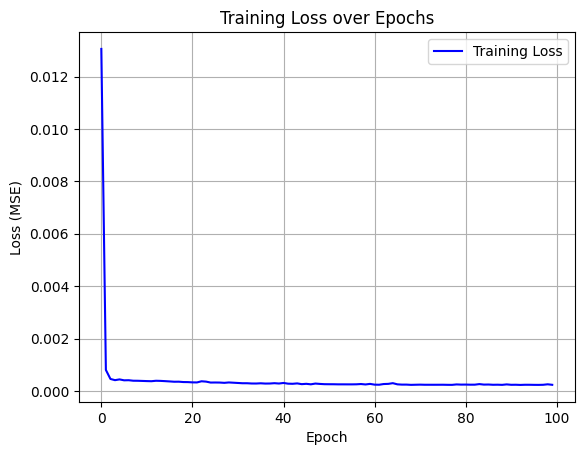

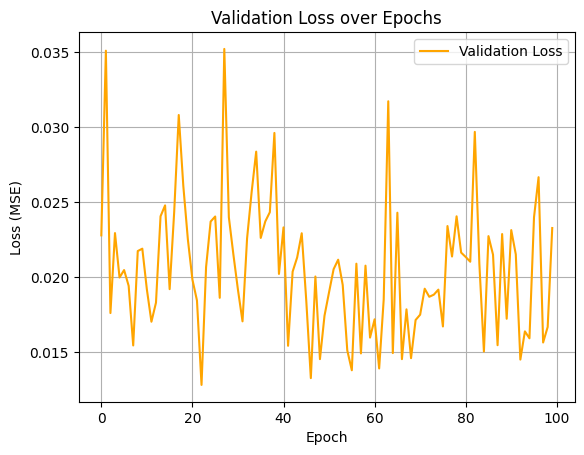

In [128]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Validation Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


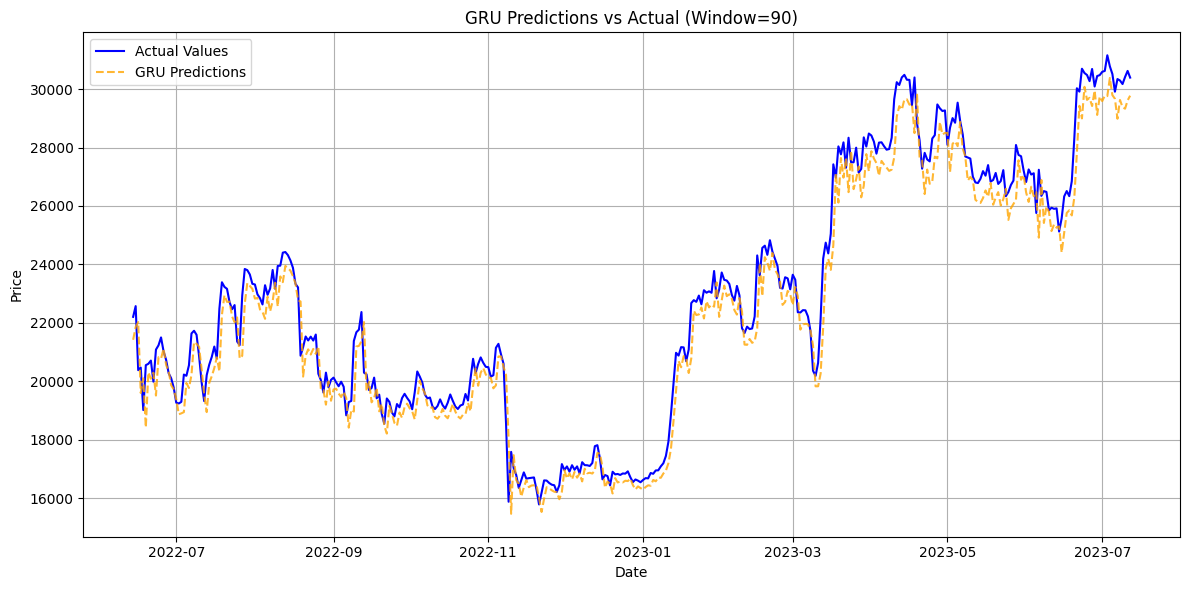

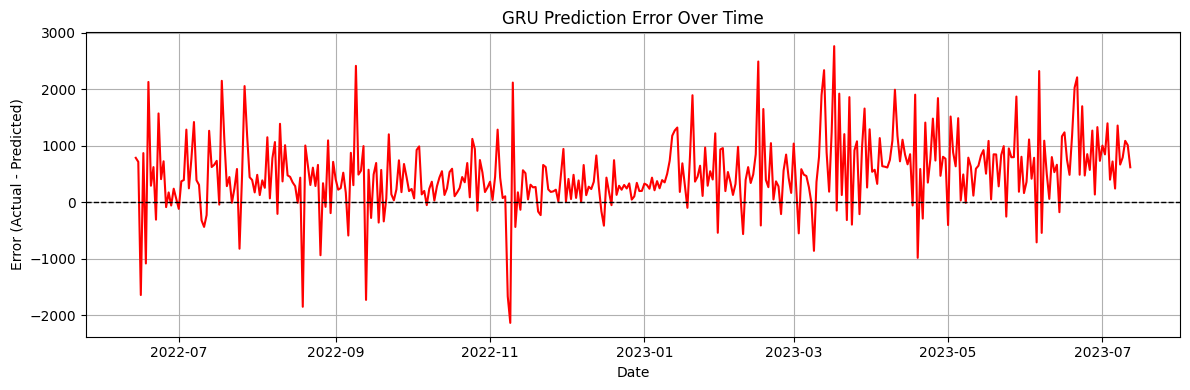

📊 GRU Evaluation Metrics (Window=90)
MSE:   664804.11
RMSE:  815.36
MAE:   630.06
MAPE:  2.72%
CE:    197936.57
R²:    0.9631



In [129]:
test_dates = test_data.index
rnn_predictions = plot_and_evaluate(
    model=gru_model_90,
    X_test=test_sequences_90,
    y_test=test_targets_90,
    test_dates=test_dates,
    scaler=scaler,
    window_size=window_size_90,
    model_name="GRU"
)